This is a Geological facies Classification for The Council Grove reservoir of gas located in Kansas USA. 

In [ ]:
# Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [3]:
# Load Well data
data = pd.read_csv('training_data.csv')

In [4]:
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [5]:
data.info

<bound method DataFrame.info of       Facies Formation        Well Name   Depth      GR  ILD_log10  DeltaPHI  \
0          3     A1 SH        SHRIMPLIN  2793.0  77.450      0.664     9.900   
1          3     A1 SH        SHRIMPLIN  2793.5  78.260      0.661    14.200   
2          3     A1 SH        SHRIMPLIN  2794.0  79.050      0.658    14.800   
3          3     A1 SH        SHRIMPLIN  2794.5  86.100      0.655    13.900   
4          3     A1 SH        SHRIMPLIN  2795.0  74.580      0.647    13.500   
...      ...       ...              ...     ...     ...        ...       ...   
3227       5      C LM  CHURCHMAN BIBLE  3120.5  46.719      0.947     1.828   
3228       5      C LM  CHURCHMAN BIBLE  3121.0  44.563      0.953     2.241   
3229       5      C LM  CHURCHMAN BIBLE  3121.5  49.719      0.964     2.925   
3230       5      C LM  CHURCHMAN BIBLE  3122.0  51.469      0.965     3.083   
3231       5      C LM  CHURCHMAN BIBLE  3122.5  50.031      0.970     2.609   

       

In [6]:
data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [7]:
data.isnull().sum()

Facies       0
Formation    0
Well Name    0
Depth        0
GR           0
ILD_log10    0
DeltaPHI     0
PHIND        0
PE           0
NM_M         0
RELPOS       0
dtype: int64

Dataset has 7 well log features (GR, ILD_log10, DeltaPhi, PHIND, PE), and 2 geological variables (NM_M, RELPOS).

In [ ]:
# We need to clean data. We know attrinutes as Well Name and Formation should be categorical data.
#Transform to categorical data

In [8]:
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')

In [10]:
#To know the names of the wells inside the dataset, we apply le method unique

In [9]:
data['Well Name'].unique()

['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (8, object): ['CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [ ]:
# The well named Recruit F9 is a pseudo well used to better represent of facies 9 (Phylloid-algal baflllestone)
# The facies aren't discrete because geological boundarys aren't clear. There is a parameter on the data named adjacent facies that represent this behavior.
# Data also include abbreviated labels of facies and we add to dataset.

In [10]:
facies_counts = data['Facies'].value_counts().sort_index()
facies_counts

Facies
1    259
2    738
3    615
4    184
5    217
6    462
7     98
8    498
9    161
Name: count, dtype: int64

In [11]:
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS'] 

In [ ]:
# We need to define colors for different facies based on type of lithology Aand using the Hex Value.

In [13]:
facies_colors = ['#F4D03F', '#F5B041', '#DC7633', '#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

In [ ]:
# Let's  link facies_lables to their color (example : sand = yellow) etc.

In [14]:
facies_counts.index = facies_labels
facies_labels

['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']

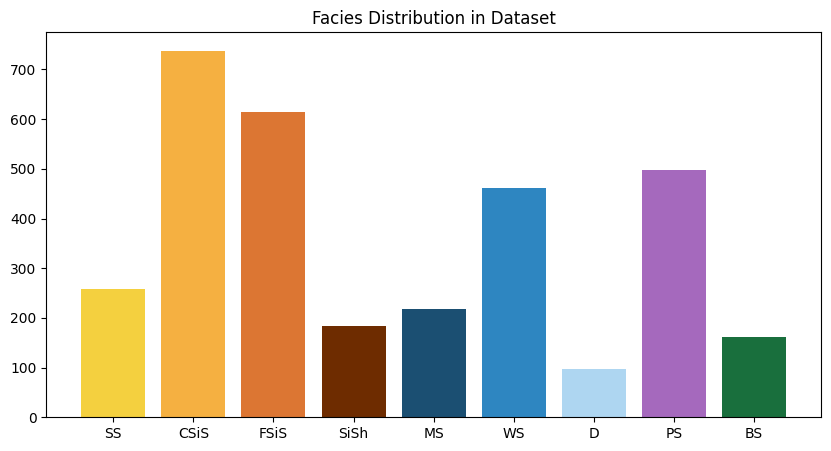

In [15]:
#Let's plot distribution of facies
plt.figure(figsize=(10, 5))
plt.bar(x=facies_labels, height=facies_counts, color=facies_colors)
plt.title('Facies Distribution in Dataset')
plt.show()


The log plots were made using the Alessandro Amato del Monte's Tutorial 

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
# We define a function named make_facies_log_plot

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 6))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.40')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((5*' ').join(['SS', 'CSiS', 'FSiS', 
                                'SiSh', 'MS', 'WS', 'D', 
                                'PS', 'BS']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')


    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)
    


In [ ]:
# We are goint to plot the first well of the list

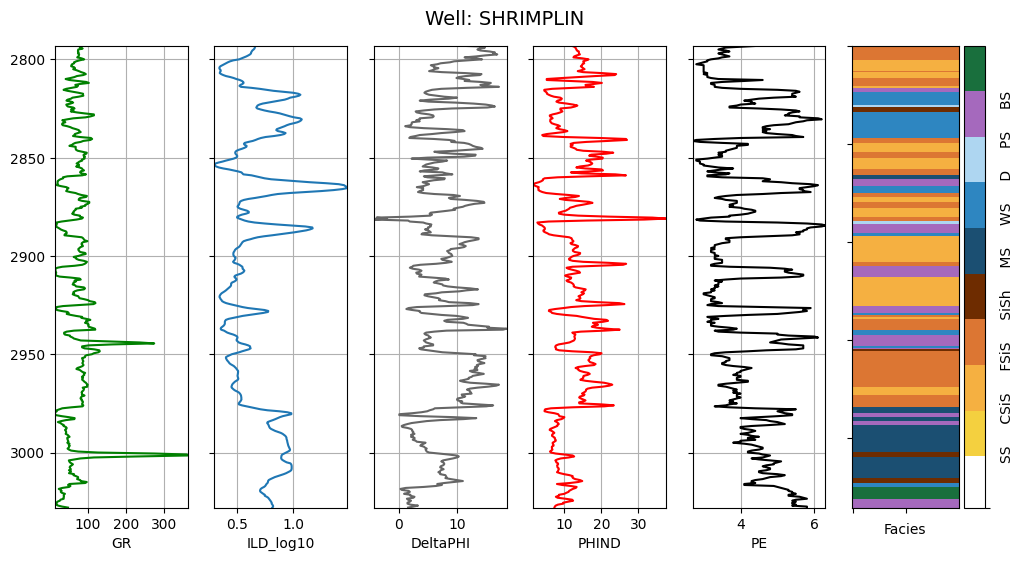

In [19]:
make_facies_log_plot(data[data['Well Name'] == 'SHRIMPLIN'], facies_colors)

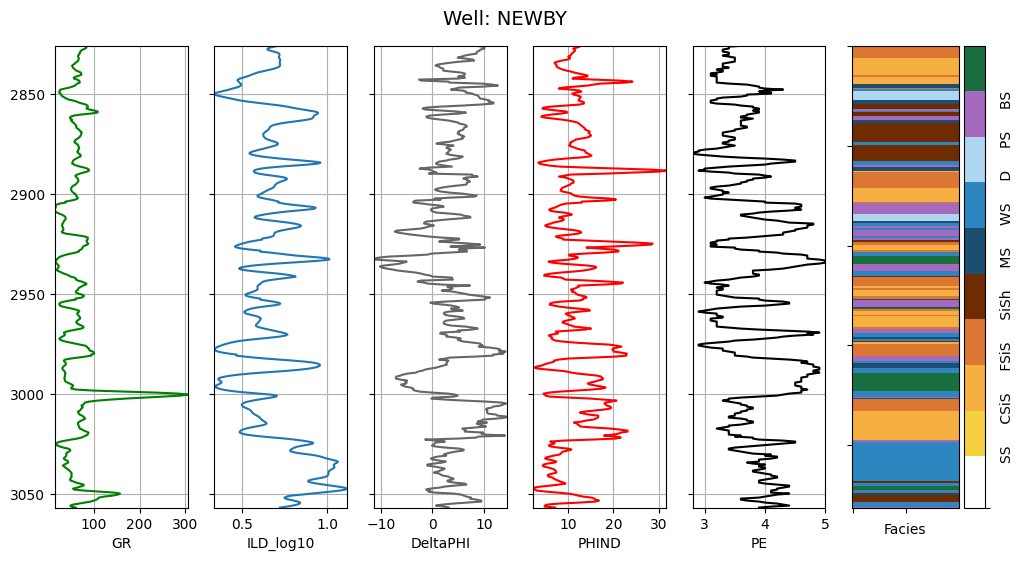

In [20]:
make_facies_log_plot(data[data['Well Name'] == 'NEWBY'], facies_colors)

In [21]:
# We will remove one well form data set to testing performance of our classifier. The remaining data will be tre trainig one.
test_data = data[data['Well Name'] ==' NEWBY']
training_data = data[data['Well Name'] != 'NEWBY']


In [22]:
input_features = (training_data[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']])

/Users/valeriaexposito/.pyenv/versions/3.10.4/envs/artefact/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


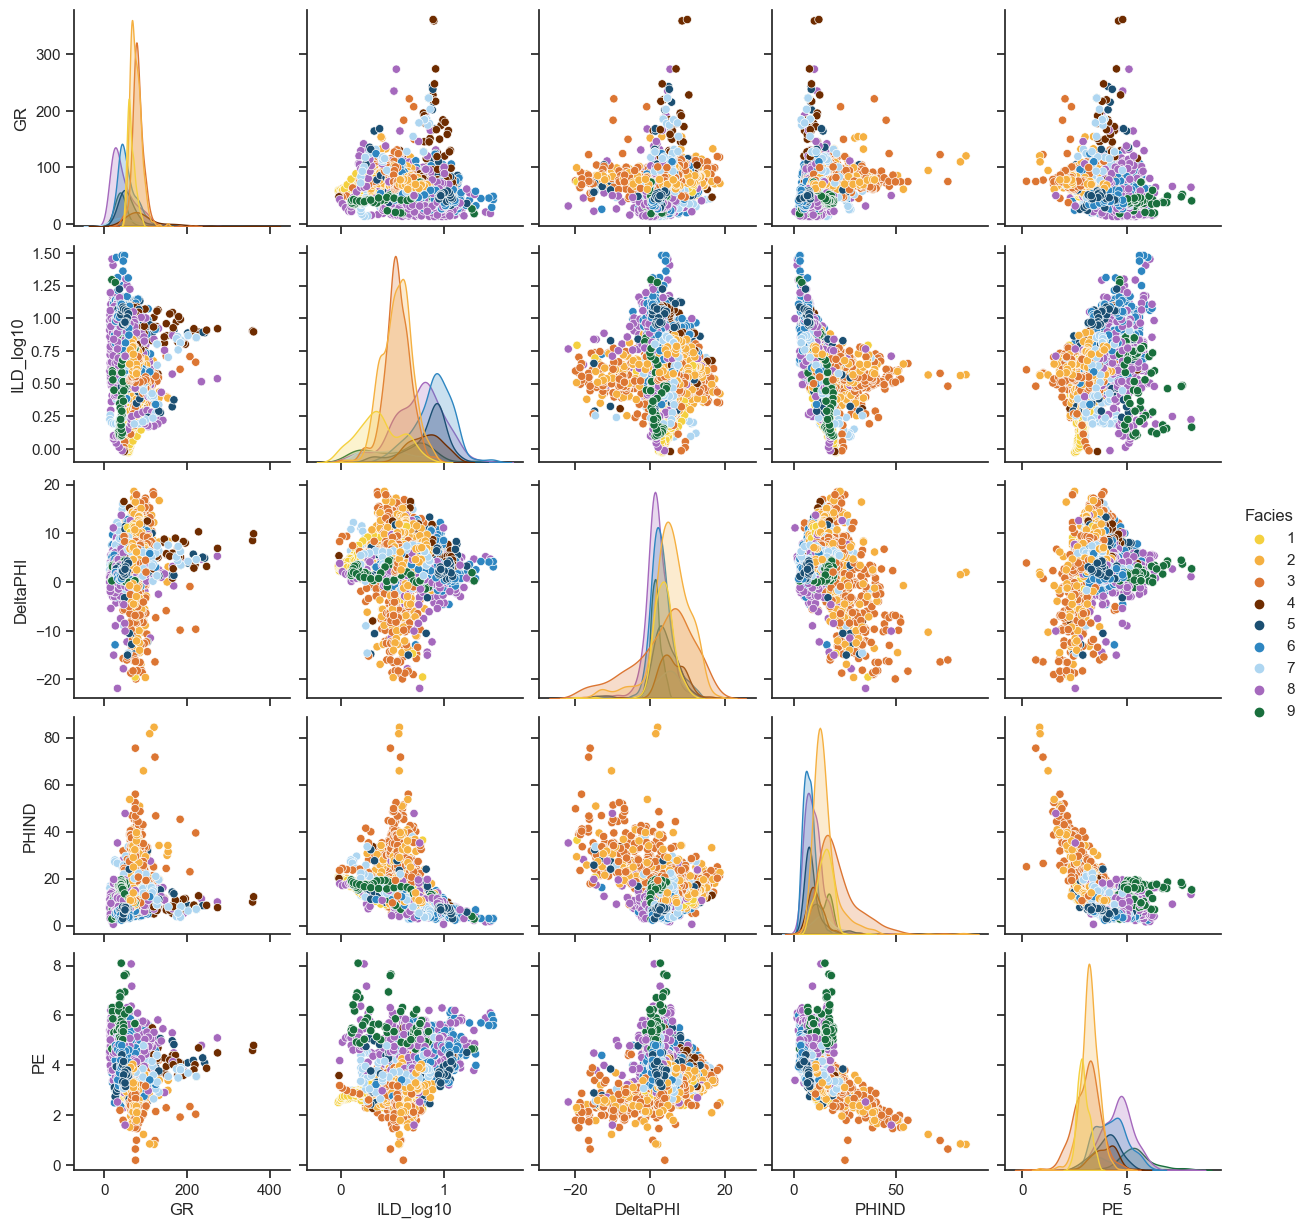

In [23]:
# Build pairplot using Seaborn

sns.set(style="ticks", color_codes= True)
features = ['Facies', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']
input_features = ['Facies', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
sns.pairplot(training_data[features], hue='Facies',  palette=facies_colors)
##features = [['Facies', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']]
## input_features = training_data[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE']]
## output_facies = training_data[['Facies']]
##sns.pairplot(input_features, hue='Facies', palette=facies_colors)

In [24]:
training_data[input_features].shape

(2769, 9)

In [25]:
# Build a correlation
training_data[input_features].corr()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.351068,-0.345546,0.406575,-0.183345,-0.351676,0.708538,0.860224,0.057302
Depth,0.351068,1.000000,-0.066504,0.168438,-0.098093,-0.056783,0.277691,0.303400,-0.000837
GR,-0.345546,-0.066504,1.000000,-0.154726,0.167330,0.249931,-0.295821,-0.288606,-0.155137
ILD_log10,0.406575,0.168438,-0.154726,1.000000,-0.100725,-0.510040,0.384656,0.534450,0.077074
DeltaPHI,-0.183345,-0.098093,0.167330,-0.100725,1.000000,-0.307470,0.059379,-0.132143,0.032691
PHIND,-0.351676,-0.056783,0.249931,-0.510040,-0.307470,1.000000,-0.583084,-0.490959,-0.026568
PE,0.708538,0.277691,-0.295821,0.384656,0.059379,-0.583084,1.000000,0.673337,0.009544
NM_M,0.860224,0.303400,-0.288606,0.534450,-0.132143,-0.490959,0.673337,1.000000,0.037118
RELPOS,0.057302,-0.000837,-0.155137,0.077074,0.032691,-0.026568,0.009544,0.037118,1.000000


(0.0, 9.0)

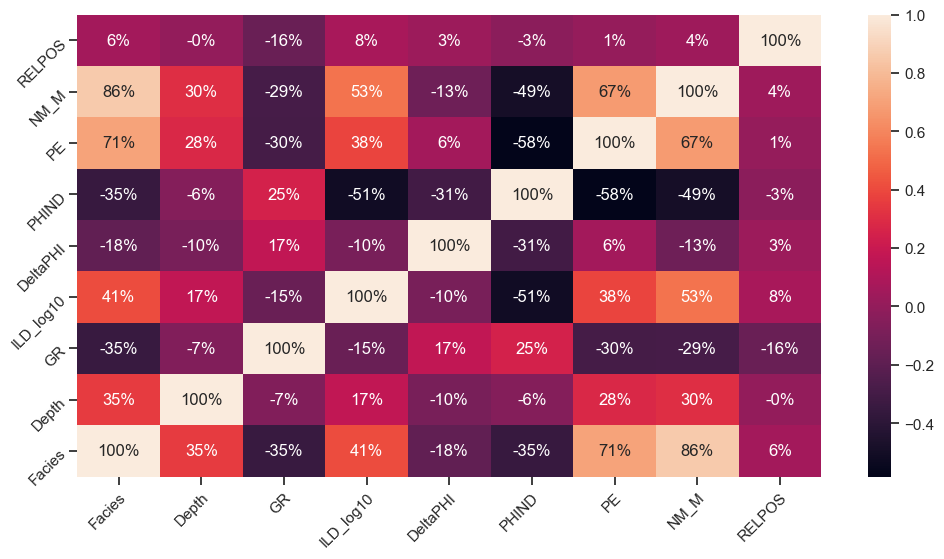

In [26]:
# Build a heatmap to visualize correlation data

%matplotlib inline
plt.figure(figsize=(12,6))

ax = sns.heatmap(training_data[input_features].corr(), annot=True, fmt ='.0%')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(training_data)-2769,9)

In [27]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [28]:
## The training data to perform classification is composed by the five  wireline logs and two geological indicators. The target data will be Facies.

output_facies_labels = training_data['Facies'].values
features_classification = training_data.drop(['Facies','Formation', 'Well Name', 'Depth'], axis=1)

In [29]:
features_classification.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,78.26,0.661,14.2,12.565,4.1,1,0.979
2,79.05,0.658,14.8,13.050,3.6,1,0.957
3,86.10,0.655,13.9,13.115,3.5,1,0.936
4,74.58,0.647,13.5,13.300,3.4,1,0.915


PREPROCESSING DATA

In [31]:
## We need to standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features_classification)
scaled_features = scaler.transform(features_classification)

In [ ]:
# Split data to modeling

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(scaled_features, output_facies_labels, test_size=0.2, random_state=10)

MODELING
Now we will modeling the Facies using different models

In [33]:
# Imports for Models Evaluation
from sklearn.metrics import confusion_matrix, jaccard_score, f1_score, precision_score

In [74]:
## Modeling with Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
acc_LR = LR.score(X_test, y_test)

print("Accuracy_LR={}".format(round(acc_LR, 3)))


Accuracy_LR=0.581


In [76]:
y_predict =LR.predict(X_test)
cm_LR = confusion_matrix(y_test, y_predict)
cm_LR

array([[32, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 8, 88, 24,  0,  0,  1,  0,  0,  0],
       [ 3, 46, 64,  1,  2,  0,  0,  2,  0],
       [ 1,  0,  0, 11,  2,  8,  0,  2,  0],
       [ 0,  1,  1,  1,  2, 16,  1, 12,  0],
       [ 1,  0,  0,  1,  3, 48,  1, 27,  0],
       [ 0,  0,  1,  2,  1,  1,  8,  5,  0],
       [ 0,  2,  2,  2,  3, 12,  1, 53,  5],
       [ 0,  0,  0,  1,  0,  0,  0,  8, 16]])

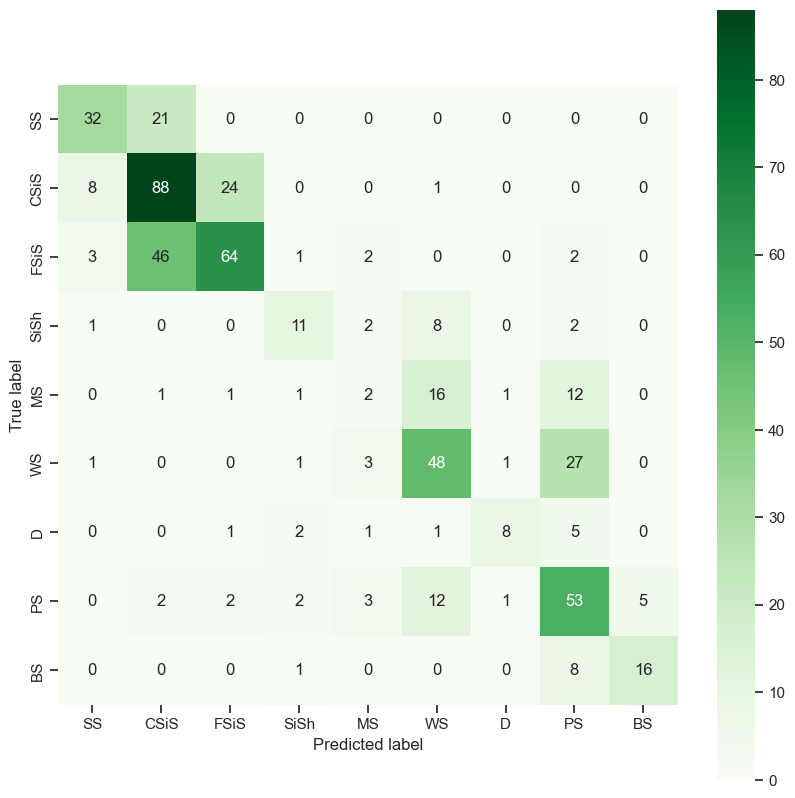

In [77]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_LR, cmap="Greens",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_LR = cm_LR[label, label] / cm_LR[:,label].sum()
    recall_LR = cm_LR[label, label] / cm_LR[label, :].sum()
    f1_score_LR = 2 * precision_LR * recall_LR / (precision_LR + recall_LR)
    print("precision_LR={}\nrecall_LR={}\nf1_score_LR={}\n".format(
        round(precision_LR, 3), round(recall_LR, 3), round(f1_score_LR, 3)))

# Results for class SS #
precision_LR=0.711
recall_LR=0.604
f1_score_LR=0.653

# Results for class CSiS #
precision_LR=0.557
recall_LR=0.727
f1_score_LR=0.631

# Results for class FSiS #
precision_LR=0.696
recall_LR=0.542
f1_score_LR=0.61

# Results for class SiSh #
precision_LR=0.579
recall_LR=0.458
f1_score_LR=0.512

# Results for class MS #
precision_LR=0.154
recall_LR=0.059
f1_score_LR=0.085

# Results for class WS #
precision_LR=0.558
recall_LR=0.593
f1_score_LR=0.575

# Results for class D #
precision_LR=0.727
recall_LR=0.444
f1_score_LR=0.552

# Results for class PS #
precision_LR=0.486
recall_LR=0.662
f1_score_LR=0.561

# Results for class BS #
precision_LR=0.762
recall_LR=0.64
f1_score_LR=0.696



Let's look at the results and consider facies SS. Precision indicates if a sample was labeled SS the probability the sample was correct is 0.711. Instead Recall means that if we know a sample has facies SS, then the probability it will be correctly labeled by the classifier is 0.604. It is desirable to have high values for both precision and recall, but often when an algorithm is tuned to increase one, the other decreases. F1 score is a combination of bith metrics (precision and recall).

In [ ]:
# Now we are going to compute another metric called Jaccard index which is defined as size of intersection of real and predicted values divided by size of the union ot those facies labels.

In [38]:
from sklearn.metrics import jaccard_score, f1_score
jlr = jaccard_score(y_test, y_predict, average='weighted')
f1lr = f1_score(y_test, y_predict, average='weighted')
print("LR Jaccard index: %.3f" % jlr )
print("LR F1-score: %.3f" % f1lr )

LR Jaccard index: 0.410
LR F1-score: 0.572


In [40]:
## Modeling with SVM (Support Vector Machines) Classifier 

from sklearn import svm
SVM = svm.SVC(C=10, gamma=1)
SVM.fit(X_train, y_train)
acc_SVM = SVM.score(X_test, y_test)
print("Accuracy_SVM={}".format(round(acc_SVM, 3)))

Accuracy_SVM=0.745


In [41]:
y_predict_SVM =SVM.predict(X_test)
cm_SVM= confusion_matrix(y_test, y_predict_SVM)
cm_SVM

array([[42, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 4, 97, 20,  0,  0,  0,  0,  0,  0],
       [ 2, 22, 90,  1,  2,  1,  0,  0,  0],
       [ 0,  0,  1, 17,  2,  4,  0,  0,  0],
       [ 0,  1,  1,  1, 20,  5,  0,  6,  0],
       [ 0,  1,  2,  5,  7, 57,  0,  8,  1],
       [ 0,  1,  0,  0,  0,  2, 12,  2,  1],
       [ 0,  0,  7,  0,  5,  8,  0, 58,  2],
       [ 0,  0,  0,  0,  0,  0,  1,  4, 20]])

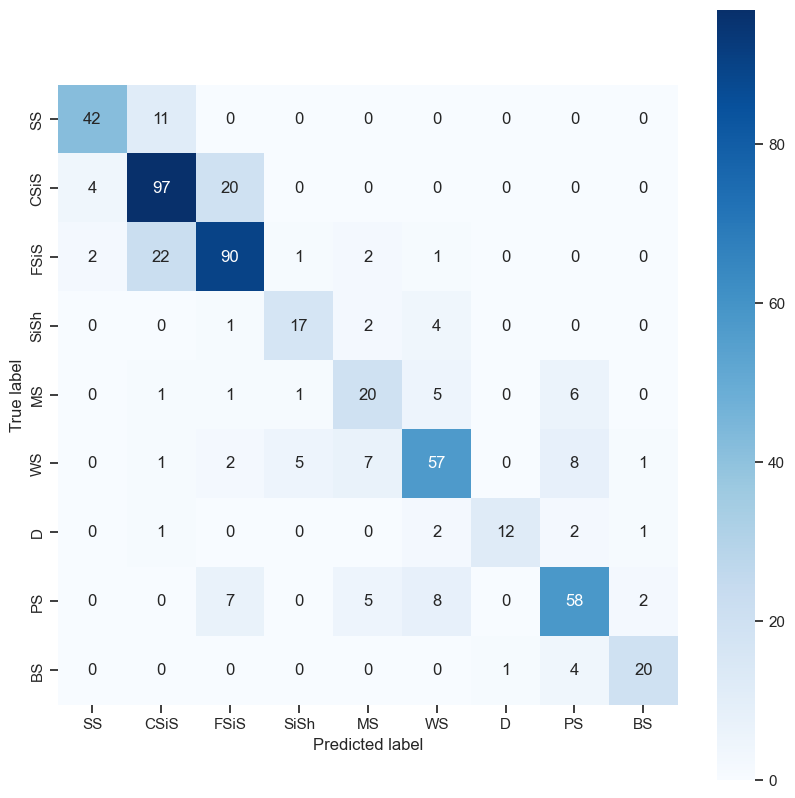

In [42]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_SVM, cmap="Blues",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_SVM = cm_SVM[label, label] / cm_SVM[:,label].sum()
    recall_SVM = cm_SVM[label, label] / cm_SVM[label, :].sum()
    f1_score_SVM = 2 * precision_SVM * recall_SVM / (precision_SVM + recall_SVM)
    print("precision_SVM={}\nrecall_SVM={}\nf1_score_SVM={}\n".format(
        round(precision_SVM, 3), round(recall_SVM, 3), round(f1_score_SVM, 3)))

# Results for class SS #
precision_SVM=0.875
recall_SVM=0.792
f1_score_SVM=0.832

# Results for class CSiS #
precision_SVM=0.729
recall_SVM=0.802
f1_score_SVM=0.764

# Results for class FSiS #
precision_SVM=0.744
recall_SVM=0.763
f1_score_SVM=0.753

# Results for class SiSh #
precision_SVM=0.708
recall_SVM=0.708
f1_score_SVM=0.708

# Results for class MS #
precision_SVM=0.556
recall_SVM=0.588
f1_score_SVM=0.571

# Results for class WS #
precision_SVM=0.74
recall_SVM=0.704
f1_score_SVM=0.722

# Results for class D #
precision_SVM=0.923
recall_SVM=0.667
f1_score_SVM=0.774

# Results for class PS #
precision_SVM=0.744
recall_SVM=0.725
f1_score_SVM=0.734

# Results for class BS #
precision_SVM=0.833
recall_SVM=0.8
f1_score_SVM=0.816



In [ ]:
# Now we are going to compute another metric called Jaccard index which is defined as size of intersection of real and predicted values divided by size of the union ot those facies labels.

In [44]:
from sklearn.metrics import jaccard_score, f1_score
jlr_SVM = jaccard_score(y_test, y_predict_SVM, average='weighted')
f1lr_SVM = f1_score(y_test, y_predict_SVM, average='weighted')
print("SVM Jaccard index: %.3f" % jlr_SVM )
print("SVM F1-score: %.3f" % f1lr_SVM )

SVM Jaccard index: 0.598
SVM F1-score: 0.746


In [45]:
## Modeling with Gaussian Process Classifier 

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
GPC = GaussianProcessClassifier().fit(X_train, y_train)
acc_GPC = GPC.score(X_test, y_test)
print("Accuracy_GPC={}".format(round(acc_GPC, 3)))



Accuracy_GPC=0.659


In [46]:
y_predict_GPC =GPC.predict(X_test)
cm_GPC= confusion_matrix(y_test, y_predict_GPC)
cm_GPC

array([[29, 22,  2,  0,  0,  0,  0,  0,  0],
       [ 5, 84, 31,  0,  0,  0,  0,  1,  0],
       [ 0, 30, 85,  0,  0,  1,  0,  1,  1],
       [ 1,  0,  0, 13,  3,  6,  0,  1,  0],
       [ 0,  1,  1,  1, 14,  7,  3,  7,  0],
       [ 1,  0,  1,  2,  6, 54,  0, 16,  1],
       [ 0,  1,  0,  0,  0,  2, 11,  4,  0],
       [ 0,  0,  4,  2,  2, 10,  0, 57,  5],
       [ 0,  0,  0,  0,  1,  0,  1,  5, 18]])

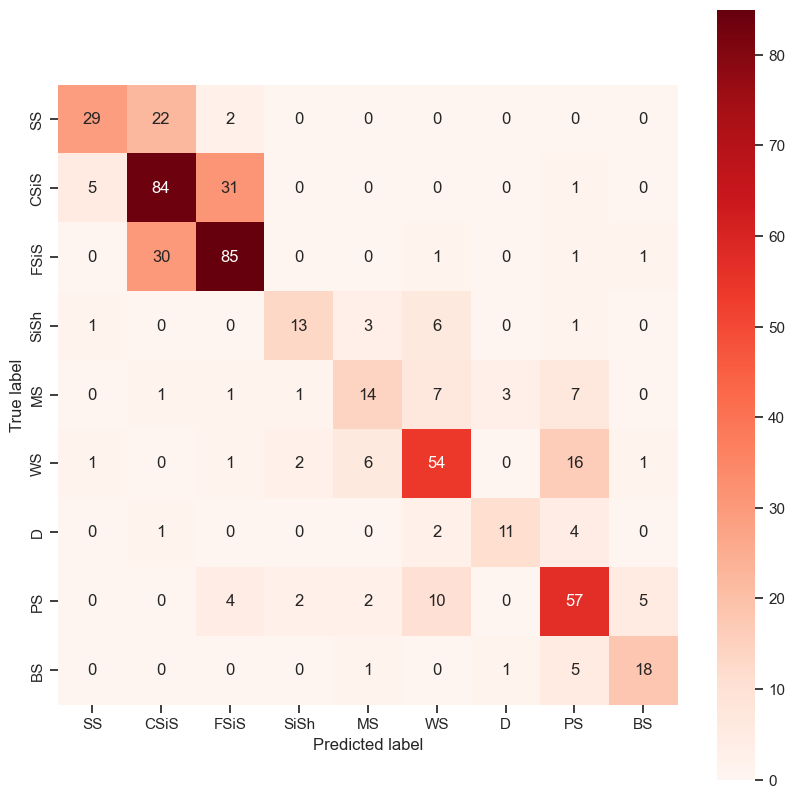

In [47]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_GPC, cmap="Reds",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_GPC = cm_GPC[label, label] / cm_GPC[:,label].sum()
    recall_GPC = cm_GPC[label, label] / cm_GPC[label, :].sum()
    f1_score_GPC = 2 * precision_GPC * recall_GPC/ (precision_GPC + recall_GPC)
    print("precision_GPC={}\nrecall_GPC={}\nf1_score_GPC={}\n".format(
        round(precision_GPC, 3), round(recall_GPC, 3), round(f1_score_GPC, 3)))

# Results for class SS #
precision_GPC=0.806
recall_GPC=0.547
f1_score_GPC=0.652

# Results for class CSiS #
precision_GPC=0.609
recall_GPC=0.694
f1_score_GPC=0.649

# Results for class FSiS #
precision_GPC=0.685
recall_GPC=0.72
f1_score_GPC=0.702

# Results for class SiSh #
precision_GPC=0.722
recall_GPC=0.542
f1_score_GPC=0.619

# Results for class MS #
precision_GPC=0.538
recall_GPC=0.412
f1_score_GPC=0.467

# Results for class WS #
precision_GPC=0.675
recall_GPC=0.667
f1_score_GPC=0.671

# Results for class D #
precision_GPC=0.733
recall_GPC=0.611
f1_score_GPC=0.667

# Results for class PS #
precision_GPC=0.62
recall_GPC=0.712
f1_score_GPC=0.663

# Results for class BS #
precision_GPC=0.72
recall_GPC=0.72
f1_score_GPC=0.72



In [49]:
# Let's compute Jaccard index and f1_score
from sklearn.metrics import jaccard_score, f1_score
jlr_GPC = jaccard_score(y_test, y_predict_GPC, average='weighted')
f1lr_GPC = f1_score(y_test, y_predict_GPC, average='weighted')
print("GPC Jaccard index: %.3f" % jlr_GPC )
print("GPC F1-score: %.3f" % f1lr_GPC )

GPC Jaccard index: 0.491
GPC F1-score: 0.657


In [50]:
# Modeling the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RFC = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
acc_RFC = RFC.score(X_test, y_test)
print("Accuracy_RFC={}".format(round(acc_RFC, 3)))

Accuracy_RFC=0.715


In [51]:
y_predict_RFC =RFC.predict(X_test)
cm_RFC= confusion_matrix(y_test, y_predict_RFC)
cm_RFC

array([[34, 16,  3,  0,  0,  0,  0,  0,  0],
       [ 4, 94, 22,  0,  0,  0,  0,  1,  0],
       [ 3, 28, 84,  0,  2,  1,  0,  0,  0],
       [ 1,  0,  0, 16,  1,  6,  0,  0,  0],
       [ 0,  0,  1,  0, 23,  5,  1,  4,  0],
       [ 1,  0,  1,  1,  7, 55,  1, 13,  2],
       [ 0,  1,  0,  1,  1,  1, 11,  2,  1],
       [ 0,  1,  3,  2,  2, 10,  0, 60,  2],
       [ 0,  0,  0,  0,  1,  0,  1,  4, 19]])

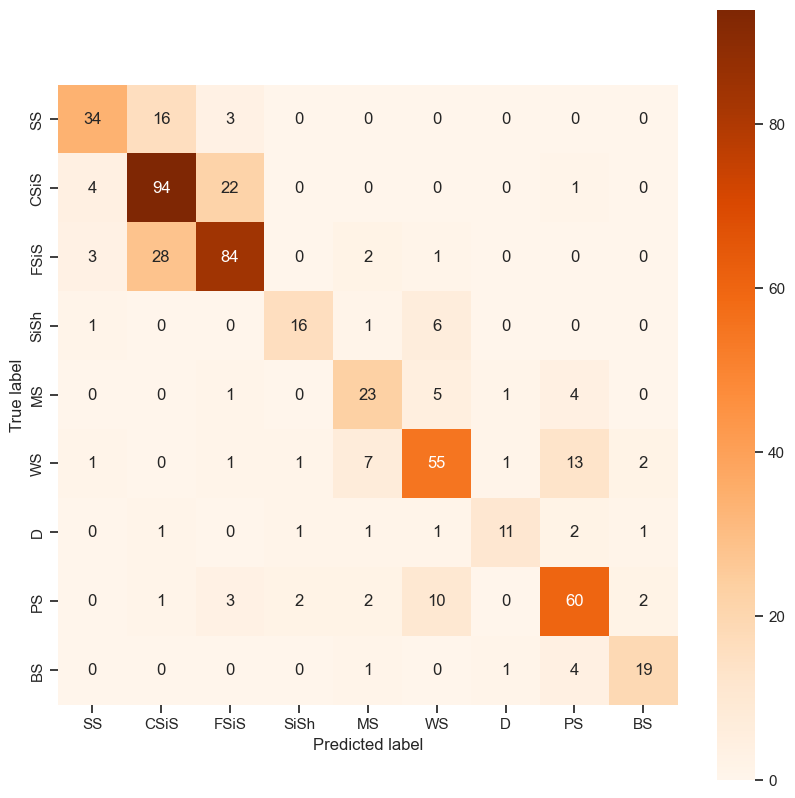

In [52]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_RFC, cmap="Oranges",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_RFC = cm_RFC[label, label] / cm_RFC[:,label].sum()
    recall_RFC = cm_RFC[label, label] / cm_RFC[label, :].sum()
    f1_score_RFC = 2 * precision_RFC * recall_RFC/ (precision_RFC + recall_RFC)
    print("precision_RFC={}\nrecall_RFC={}\nf1_score_RFC={}\n".format(
        round(precision_RFC, 3), round(recall_RFC, 3), round(f1_score_RFC, 3)))

# Results for class SS #
precision_RFC=0.791
recall_RFC=0.642
f1_score_RFC=0.708

# Results for class CSiS #
precision_RFC=0.671
recall_RFC=0.777
f1_score_RFC=0.72

# Results for class FSiS #
precision_RFC=0.737
recall_RFC=0.712
f1_score_RFC=0.724

# Results for class SiSh #
precision_RFC=0.8
recall_RFC=0.667
f1_score_RFC=0.727

# Results for class MS #
precision_RFC=0.622
recall_RFC=0.676
f1_score_RFC=0.648

# Results for class WS #
precision_RFC=0.705
recall_RFC=0.679
f1_score_RFC=0.692

# Results for class D #
precision_RFC=0.786
recall_RFC=0.611
f1_score_RFC=0.688

# Results for class PS #
precision_RFC=0.714
recall_RFC=0.75
f1_score_RFC=0.732

# Results for class BS #
precision_RFC=0.792
recall_RFC=0.76
f1_score_RFC=0.776



In [54]:
# Let's compute Jaccard index and f1_score
from sklearn.metrics import jaccard_score, f1_score
jlr_RFC = jaccard_score(y_test, y_predict_RFC, average='weighted')
f1lr_RFC = f1_score(y_test, y_predict_RFC, average='weighted')
print("RFC Jaccard index: %.3f" % jlr_RFC )
print("RFC F1-score: %.3f" % f1lr_RFC )

RFC Jaccard index: 0.557
RFC F1-score: 0.715


In [56]:
## Modeling Neural Network Classifier

from sklearn.neural_network import MLPClassifier
NNC = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, solver='adam', batch_size=10, hidden_layer_sizes=200 ).fit(X_train, y_train)
acc_NNC = NNC.score(X_test, y_test)
print("Accuracy_NNC={}".format(round(acc_NNC, 3)))

Accuracy_NNC=0.711


In [57]:
y_predict_NNC = NNC.predict(X_test)
cm_NNC= confusion_matrix(y_test, y_predict_NNC)
cm_NNC

array([[37, 15,  1,  0,  0,  0,  0,  0,  0],
       [ 7, 84, 28,  0,  1,  0,  0,  1,  0],
       [ 2, 18, 94,  1,  1,  1,  1,  0,  0],
       [ 0,  0,  0, 15,  4,  4,  0,  1,  0],
       [ 0,  0,  1,  2, 16,  5,  1,  9,  0],
       [ 1,  0,  1,  3,  5, 54,  0, 17,  0],
       [ 0,  1,  0,  0,  0,  1, 12,  3,  1],
       [ 0,  0,  4,  3,  1,  7,  0, 63,  2],
       [ 0,  0,  0,  0,  1,  0,  1,  4, 19]])

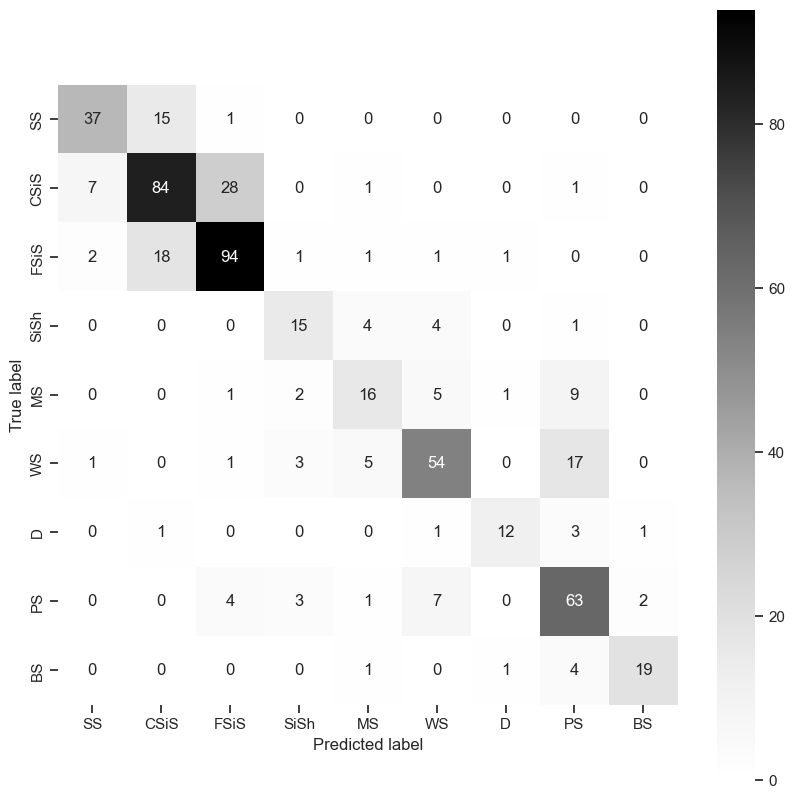

In [58]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_NNC, cmap="Greys",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_NNC = cm_NNC[label, label] / cm_NNC[:,label].sum()
    recall_NNC = cm_NNC[label, label] / cm_NNC[label, :].sum()
    f1_score_NNC = 2 * precision_NNC * recall_NNC/ (precision_NNC + recall_NNC)
    print("precision_NNC={}\nrecall_NNC={}\nf1_score_NNC={}\n".format(
        round(precision_NNC, 3), round(recall_NNC, 3), round(f1_score_NNC, 3)))

# Results for class SS #
precision_NNC=0.787
recall_NNC=0.698
f1_score_NNC=0.74

# Results for class CSiS #
precision_NNC=0.712
recall_NNC=0.694
f1_score_NNC=0.703

# Results for class FSiS #
precision_NNC=0.729
recall_NNC=0.797
f1_score_NNC=0.761

# Results for class SiSh #
precision_NNC=0.625
recall_NNC=0.625
f1_score_NNC=0.625

# Results for class MS #
precision_NNC=0.552
recall_NNC=0.471
f1_score_NNC=0.508

# Results for class WS #
precision_NNC=0.75
recall_NNC=0.667
f1_score_NNC=0.706

# Results for class D #
precision_NNC=0.8
recall_NNC=0.667
f1_score_NNC=0.727

# Results for class PS #
precision_NNC=0.643
recall_NNC=0.788
f1_score_NNC=0.708

# Results for class BS #
precision_NNC=0.864
recall_NNC=0.76
f1_score_NNC=0.809



In [60]:
# Let's compute Jaccard index and f1_score
from sklearn.metrics import jaccard_score, f1_score
jlr_NNC = jaccard_score(y_test, y_predict_NNC, average='weighted')
f1lr_NNC = f1_score(y_test, y_predict_NNC, average='weighted')
print("NNC Jaccard index: %.3f" % jlr_NNC )
print("NNC F1-score: %.3f" % f1lr_NNC )

NNC Jaccard index: 0.554
NNC F1-score: 0.710


In [61]:
## Modeling Desicion Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
DTC.fit(X_train, y_train)
acc_DTC = DTC.score(X_test, y_test)
print("Accuracy_DTC={}".format(round(acc_DTC, 3)))

Accuracy_DTC=0.608


In [62]:
y_predict_DTC = DTC.predict(X_test)
cm_DTC= confusion_matrix(y_test, y_predict_DTC)
cm_DTC

array([[30, 19,  4,  0,  0,  0,  0,  0,  0],
       [11, 81, 27,  0,  1,  1,  0,  0,  0],
       [ 3, 40, 73,  1,  0,  1,  0,  0,  0],
       [ 1,  0,  0, 17,  1,  5,  0,  0,  0],
       [ 1,  1,  1,  1, 16,  3,  2,  9,  0],
       [ 0,  3,  1,  1, 17, 43,  0, 15,  1],
       [ 0,  1,  0,  1,  2,  0, 10,  2,  2],
       [ 1,  0,  3,  6,  5, 13,  0, 50,  2],
       [ 0,  0,  0,  0,  0,  0,  2,  6, 17]])

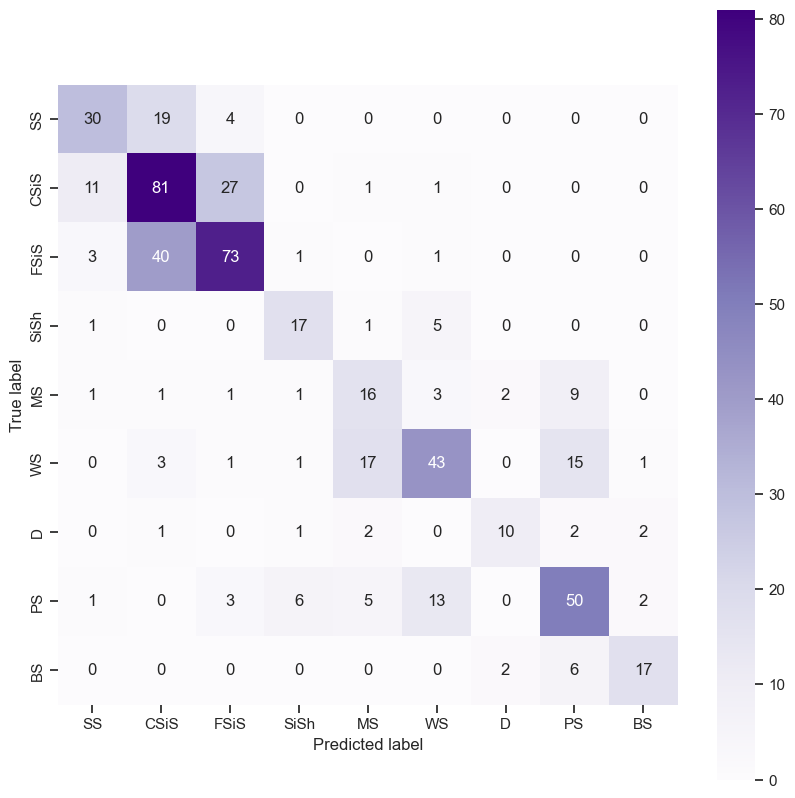

In [63]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_DTC, cmap="Purples",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [65]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_DTC = cm_DTC[label, label] / cm_DTC[:,label].sum()
    recall_DTC = cm_DTC[label, label] / cm_DTC[label, :].sum()
    f1_score_DTC = 2 * precision_DTC * recall_DTC/ (precision_DTC + recall_DTC)
    print("precision_DTC={}\nrecall_DTC={}\nf1_score_DTC={}\n".format(
        round(precision_DTC, 3), round(recall_DTC, 3), round(f1_score_DTC, 3)))

# Results for class SS #
precision_DTC=0.638
recall_DTC=0.566
f1_score_DTC=0.6

# Results for class CSiS #
precision_DTC=0.559
recall_DTC=0.669
f1_score_DTC=0.609

# Results for class FSiS #
precision_DTC=0.67
recall_DTC=0.619
f1_score_DTC=0.643

# Results for class SiSh #
precision_DTC=0.63
recall_DTC=0.708
f1_score_DTC=0.667

# Results for class MS #
precision_DTC=0.381
recall_DTC=0.471
f1_score_DTC=0.421

# Results for class WS #
precision_DTC=0.652
recall_DTC=0.531
f1_score_DTC=0.585

# Results for class D #
precision_DTC=0.714
recall_DTC=0.556
f1_score_DTC=0.625

# Results for class PS #
precision_DTC=0.61
recall_DTC=0.625
f1_score_DTC=0.617

# Results for class BS #
precision_DTC=0.773
recall_DTC=0.68
f1_score_DTC=0.723



In [66]:
# Let's compute Jaccard index and f1_score
from sklearn.metrics import jaccard_score, f1_score
jlr_DTC = jaccard_score(y_test, y_predict_DTC, average='weighted')
f1lr_DTC = f1_score(y_test, y_predict_DTC, average='weighted')
print("DTC Jaccard index: %.3f" % jlr_DTC )
print("DTC F1-score: %.3f" % f1lr_DTC )

DTC Jaccard index: 0.441
DTC F1-score: 0.610


In [67]:
# Modeling the K Neigbor Classifier

from sklearn.neighbors import KNeighborsClassifier

#To correct model the kneighbor classifier we need to choose the best value of k, for this porpose we need to run a range of values.

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
cm_KNN = [];

for n in range(1, Ks):
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_predict_KNN = KNN.predict(X_test)

    mean_acc[n-1]=np.mean(y_predict_KNN==y_test);
    std_acc[n-1]=np.std(y_predict_KNN)/np.sqrt(y_predict_KNN.shape[0])

acc_KNN = KNN.score(X_test, y_test)
print("Accuracy_KNN={}".format(round(acc_KNN, 3)))

Accuracy_KNN=0.606


In [68]:
# We can test with k=5
k=5
KNN = KNeighborsClassifier(n_neighbors=k, leaf_size=50, p=1, weights='distance').fit(X_train, y_train)
acc_KNN = KNN.score(X_test, y_test)
print("Accuracy_KNN={}".format(round(acc_KNN, 3)))

Accuracy_KNN=0.729


In [ ]:
## It is a good accuracy with k=5

In [69]:
y_predict_KNN = KNN.predict(X_test)
cm_KNN= confusion_matrix(y_test, y_predict_KNN)
cm_KNN




array([[41, 10,  2,  0,  0,  0,  0,  0,  0],
       [ 7, 90, 23,  0,  0,  0,  0,  1,  0],
       [ 1, 23, 90,  0,  2,  1,  1,  0,  0],
       [ 1,  0,  0, 16,  2,  5,  0,  0,  0],
       [ 0,  0,  1,  0, 23,  4,  2,  4,  0],
       [ 1,  0,  1,  5,  8, 54,  0,  9,  3],
       [ 0,  1,  0,  1,  0,  1, 13,  1,  1],
       [ 0,  0,  4,  2,  3, 10,  0, 58,  3],
       [ 0,  0,  0,  0,  0,  0,  1,  5, 19]])

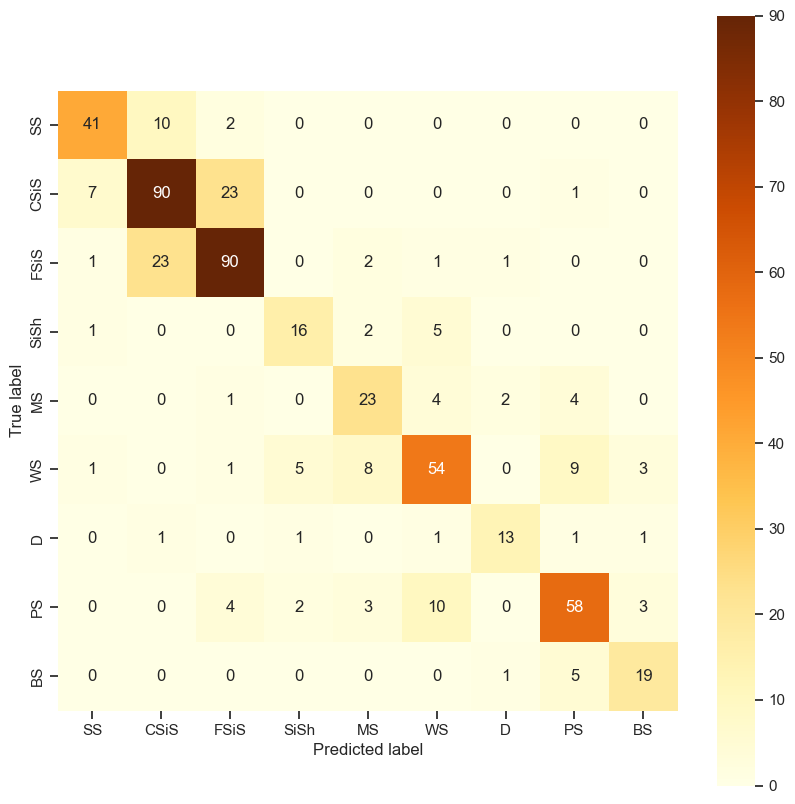

In [71]:
# Display confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm_KNN, cmap="YlOrBr",
            xticklabels=facies_labels,
            yticklabels=facies_labels,
            annot=True, square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [72]:
# Let's compute Classifiction report (Precision, Recall, F1_score)
for label, facies_label in enumerate(facies_labels):
    print("# Results for class {} #".format(facies_label))
    #not_label = abs(label - 1)
    precision_KNN = cm_KNN[label, label] / cm_KNN[:,label].sum()
    recall_KNN = cm_KNN[label, label] / cm_KNN[label, :].sum()
    f1_score_KNN = 2 * precision_KNN * recall_KNN/ (precision_KNN + recall_KNN)
    print("precision_KNN={}\nrecall_KNN={}\nf1_score_KNN={}\n".format(
        round(precision_KNN, 3), round(recall_KNN, 3), round(f1_score_KNN, 3)))

# Results for class SS #
precision_KNN=0.804
recall_KNN=0.774
f1_score_KNN=0.788

# Results for class CSiS #
precision_KNN=0.726
recall_KNN=0.744
f1_score_KNN=0.735

# Results for class FSiS #
precision_KNN=0.744
recall_KNN=0.763
f1_score_KNN=0.753

# Results for class SiSh #
precision_KNN=0.667
recall_KNN=0.667
f1_score_KNN=0.667

# Results for class MS #
precision_KNN=0.605
recall_KNN=0.676
f1_score_KNN=0.639

# Results for class WS #
precision_KNN=0.72
recall_KNN=0.667
f1_score_KNN=0.692

# Results for class D #
precision_KNN=0.765
recall_KNN=0.722
f1_score_KNN=0.743

# Results for class PS #
precision_KNN=0.744
recall_KNN=0.725
f1_score_KNN=0.734

# Results for class BS #
precision_KNN=0.731
recall_KNN=0.76
f1_score_KNN=0.745



In [73]:
# Let's compute Jaccard index and f1_score
from sklearn.metrics import jaccard_score, f1_score
jlr_KNN = jaccard_score(y_test, y_predict_KNN, average='weighted')
f1lr_KNN = f1_score(y_test, y_predict_KNN, average='weighted')
print("KNN Jaccard index: %.3f" % jlr_KNN )
print("KNN F1-score: %.3f" % f1lr_KNN )

KNN Jaccard index: 0.575
KNN F1-score: 0.729


Once all model have been applied, we need to compare models between them.  We create a table.

In [79]:
model_metrics ={'Model type' : ['LR', 'SVM', 'GPC', 'RFC', 'NNC', 'DTC', 'KNN'], 'Jaccard index' : [jlr, jlr_SVM, jlr_GPC, jlr_RFC, jlr_NNC, jlr_DTC, jlr_KNN], 'F1-Score' : [f1lr, f1lr_SVM, f1lr_GPC, f1lr_RFC, f1lr_NNC, f1lr_DTC, f1_score_KNN]}
model_comparison = pd.DataFrame(model_metrics, columns=['Model type', 'Jaccard index', 'F1-Score'])
model_comparison.round(2)


,Model type,Jaccard index,F1-Score
0,LR,0.41,0.57
1,SVM,0.60,0.75
2,GPC,0.49,0.66
3,RFC,0.56,0.71
4,NNC,0.55,0.71
5,DTC,0.44,0.61
6,KNN,0.58,0.75
